# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,real estate,31.0,none,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,car,38.0,none,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,no known property,23.0,none,for free,1.0,skilled,1.0,yes,bad


(1) В какой шкале представлены все признаки в наборе?<br>
checking_status - интервальный <br>
duration - абсолютный<br>
credit_history - номинальный<br>
purpose - номинальный<br>
credit_amount - абсолютный<br>
savings_status - интервальная<br>
employment - интервальный<br>
installment_commitment - аclassбсолютный<br>
other_parties - номинальная<br>
property_magnitude - номинальная<br>
age - абсолютная<br>
other_payment_plans - номинальная<br>
housing - номинальная<br>
existing_credits - абсолютный<br>
job - номинальная<br>
num_dependents - абсолютный<br>
foreign_worker - номинальная<br>
class - номинальная<br>

(2) Укажите признак с наименьшей дисперсией<br>
Минимальная дисперсия у num_dependents = 1.396e-01

In [3]:
credit_df.var()

duration                  1.625e+02
credit_amount             7.967e+06
installment_commitment    1.224e+00
age                       1.271e+02
existing_credits          3.439e-01
num_dependents            1.396e-01
dtype: float64

(3) Среднее какого признака отличается для двух классов сильнее всего?

In [4]:
credit_df.where(credit_df['class']=='good').mean() - credit_df.where(credit_df['class']=='bad').mean()

duration                   -4.982
credit_amount            -573.110
installment_commitment     -0.103
age                         3.304
existing_credits            0.099
num_dependents              0.022
dtype: float64

Ответ: credit_amount

(4) В каком классе больше всего skilled работников?

In [5]:
print('Good = ', credit_df['job'].where(credit_df['class']=='good').where(credit_df['job']=='skilled').count())
print('Bad = ', credit_df['job'].where(credit_df['class']=='bad').where(credit_df['job']=='skilled').count())

Good =  213
Bad =  107


Ответ: в классе good

(5) Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:>

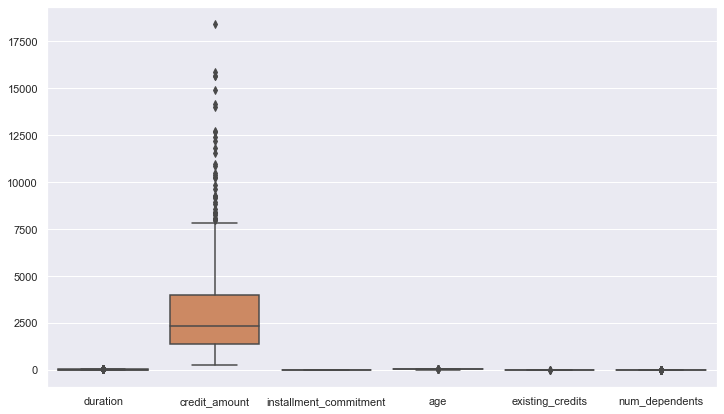

In [6]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

Ответ: Есть, все кроме installment_commitment

(6) Сколько пропущенных значений в наборе?

In [7]:
credit_df_nan = credit_df.replace(-1, np.NaN).replace('no checking', np.NaN).replace('no known savings', np.NaN).replace('unemployed', np.NaN).replace('none', np.NaN).replace('none', np.NaN)
no_zero_columns = list (set(credit_df_nan.columns))
(credit_df_nan[no_zero_columns].isnull()).sum()

age                         0
savings_status             95
num_dependents              0
checking_status           197
property_magnitude          0
other_payment_plans       404
class                       0
purpose                     0
housing                     0
credit_history              0
other_parties             454
employment                 27
credit_amount               0
job                         0
foreign_worker              0
duration                   27
existing_credits            0
installment_commitment      0
dtype: int64

In [8]:
(credit_df_nan[no_zero_columns].isnull()).sum().sum()

1204

(7) Попытайтесь заполнить пропущенные значения

In [9]:
#Удаляем колонки, где много пропусков
credit_df_filled = credit_df_nan
credit_df_filled.isnull().mean()

checking_status           0.392
duration                  0.054
credit_history            0.000
purpose                   0.000
credit_amount             0.000
savings_status            0.189
employment                0.054
installment_commitment    0.000
other_parties             0.904
property_magnitude        0.000
age                       0.000
other_payment_plans       0.805
housing                   0.000
existing_credits          0.000
job                       0.000
num_dependents            0.000
foreign_worker            0.000
class                     0.000
dtype: float64

In [10]:
credit_df_filled = credit_df_filled.drop(['other_parties', 'other_payment_plans'], axis=1)
credit_df_filled

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,real estate,32.0,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,car,28.0,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,life insurance,27.0,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,no known property,42.0,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,real estate,49.0,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NaN,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,real estate,31.0,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,NaN,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,car,38.0,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,no known property,23.0,for free,1.0,skilled,1.0,yes,bad


In [11]:
#Заполняем пустые места модой
credit_df_filled['checking_status'] = credit_df_nan['checking_status'].fillna(credit_df_nan['checking_status'].mode().max())
credit_df_filled['duration'] = credit_df_nan['duration'].fillna(credit_df_nan['duration'].mode().max())
credit_df_filled['savings_status'] = credit_df_nan['savings_status'].fillna(credit_df_nan['savings_status'].mode().max())
credit_df_filled['employment'] = credit_df_nan['employment'].fillna(credit_df_nan['employment'].mode().max())

In [12]:
credit_df_filled.isnull().mean()

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
property_magnitude        0.0
age                       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
foreign_worker            0.0
class                     0.0
dtype: float64

(8) Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

<AxesSubplot:xlabel='class', ylabel='count'>

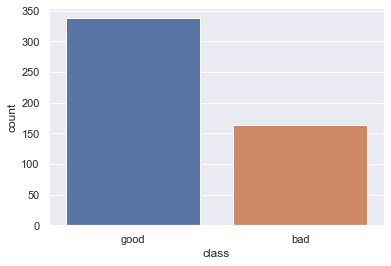

In [19]:
sns.countplot(x='class', data=credit_df_filled)

<AxesSubplot:>

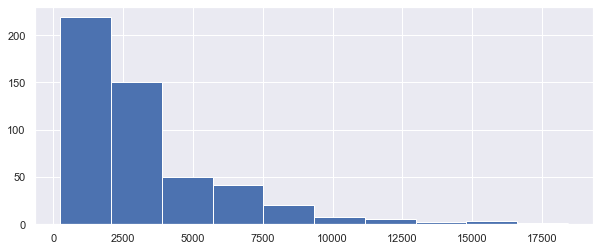

In [22]:
credit_df_filled['credit_amount'].hist(figsize=(10, 4))

<AxesSubplot:>

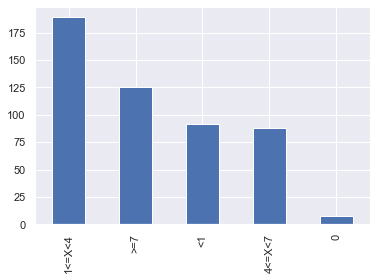

In [27]:
credit_df_filled['employment'].value_counts().plot(kind = 'bar')

(9) Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

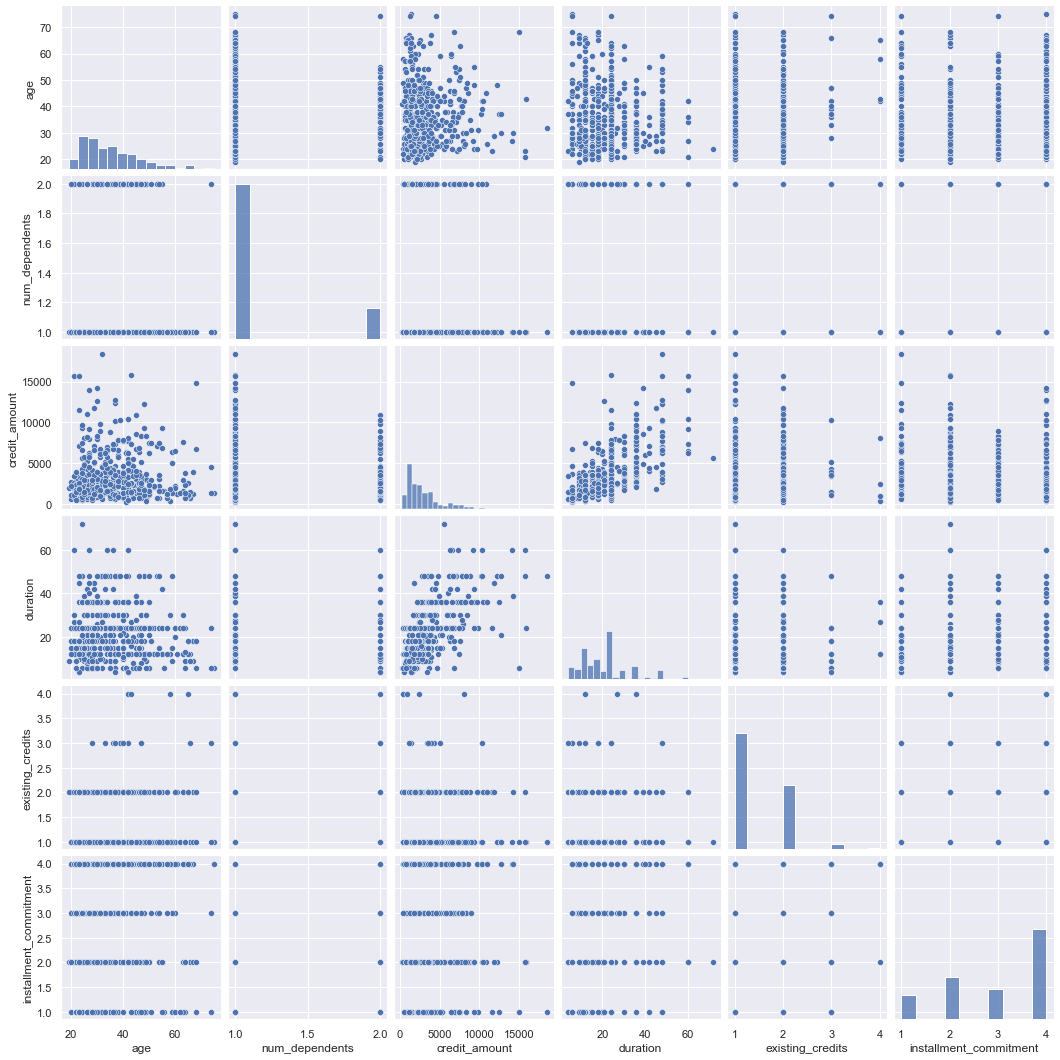

In [33]:
num_columns = list(set(credit_df_filled.columns)) ##-  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(credit_df_filled[num_columns])

duration и credit_amount - есть намек на прямуя зависимость.<br>
age и credit_amount - в основном кредиты берут люди от 20 до 50 лет.<br>
age и duration - видно, что чем меньше возраст, тем на более долгий срок выдаются кредиты.<br>
existing_credits и credit_amount - видно, что чем меньше кредитов на человека, тем больший размер этих кредитов.<br>
existing_credits и duration - так же как и с credit_amount, чем меньше у человека кредитов, тем более долгий срок они имеют.<br>
<br>
Остальные признаки не имеют очевидных зависимостей.

In [37]:
corr_matrix = credit_df_filled[num_columns].corr()
corr_matrix

,age,num_dependents,credit_amount,duration,existing_credits,installment_commitment
age,1.000,0.122,0.044,-0.042,0.151,-0.011
num_dependents,0.122,1.000,0.009,-0.052,0.116,-0.096
credit_amount,0.044,0.009,1.000,0.606,0.025,-0.256
duration,-0.042,-0.052,0.606,1.000,0.007,0.095
existing_credits,0.151,0.116,0.025,0.007,1.000,-0.002
installment_commitment,-0.011,-0.096,-0.256,0.095,-0.002,1.000


<AxesSubplot:>

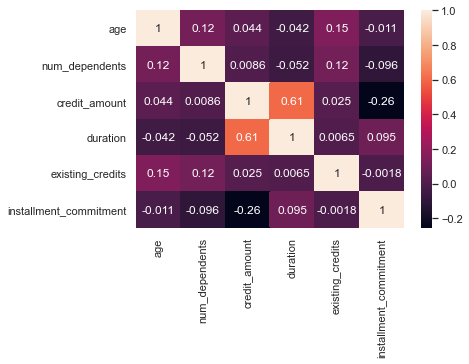

In [38]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

Из тепловой карты видно, что между duration и credit_amount действительно наблюдается достаточно явная прямая зависимость, тогда как среди остальных признаков, ее нет.

(10) Какой признак(и) имеет смысл стандартизировать? Почему?<br>
<br>
Стандартизировать можно любой признак, так как все зависит от алгоритма, который будет использоваться для дальнейшего анализа, и от того что именно будет анализироваться.

Feature: 0, Score: 1.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000


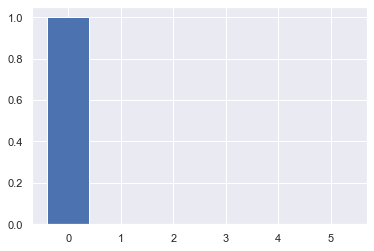

In [90]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
num_columns = list(set(credit_df_filled.columns) - set(['checking_status',
                                                          'credit_history',
                                                          'purpose',
                                                          'savings_status',
                                                          'employment',
                                                          'other_parties',
                                                          'property_magnitude',
                                                          'other_payment_plans',
                                                          'housing','job',
                                                          'foreign_worker',
                                                          'class']))
credit_df_filled[num_columns]
std_scaler = StandardScaler().fit(credit_df_filled[num_columns])
cols_std_scaled = std_scaler.transform(credit_df_filled[num_columns])
X = cols_std_scaled[:]
y = cols_std_scaled[:,0]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

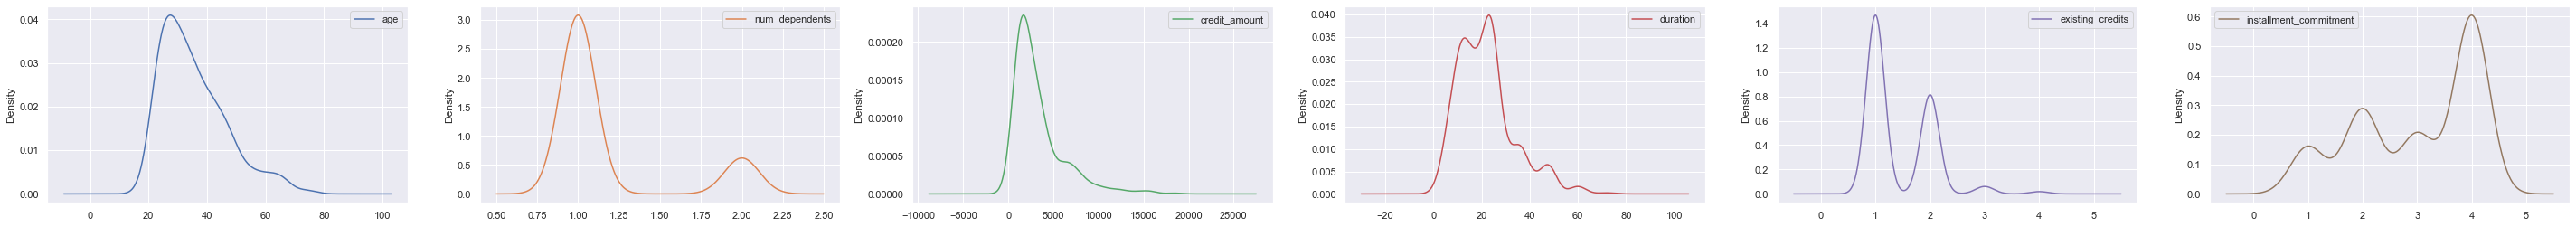

In [108]:
credit_df_filled[['age', 'num_dependents', 'credit_amount', 'duration', 'existing_credits', 'installment_commitment']].plot(kind='density', layout=(1, 6), subplots=True,
                                   figsize=(50, 4), sharex=False)

(11) Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>
<br>
Просрочки по кредитам - наглядно показывает на сколько человеку можно доверять.